In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
#import researchpy as rp 
# can't use researchpy since it's not a module here
import scipy.stats as stats
from scipy.stats import norm

In [2]:
GPS_Data = pd.read_csv('GPS_GUI_Data_2021-11-17_AR.csv')
GPS0Data = pd.read_csv('Map-data-0.csv')
GPS1Data = pd.read_csv('Map-data-1.csv')

In [3]:
GPS_Data

,Epoch time,Latitude,Longitude,Air Quality PM 2.5 (ug/m3),Radiation (cps)
0,1.634789e+09,0,0,0,0.0
1,1.634789e+09,0,0,0,0.0
2,1.634789e+09,0,0,0,31.0
3,1.634789e+09,0,0,0,41.0
4,1.634789e+09,0,0,0,34.0
...,...,...,...,...,...
231,1.634790e+09,0,0,0,28.6
232,1.634790e+09,0,0,0,32.2
233,1.634790e+09,0,0,0,34.8
234,1.634790e+09,0,0,0,32.0


In [4]:
# remove first two entries since radiation was not detected (most likely still indoors at the time)
GPSDataNew = GPS_Data.drop([0, 1]) 
GPSDataNew

,Epoch time,Latitude,Longitude,Air Quality PM 2.5 (ug/m3),Radiation (cps)
2,1.634789e+09,0,0,0,31.0
3,1.634789e+09,0,0,0,41.0
4,1.634789e+09,0,0,0,34.0
5,1.634789e+09,0,0,0,32.4
6,1.634789e+09,0,0,0,33.4
...,...,...,...,...,...
231,1.634790e+09,0,0,0,28.6
232,1.634790e+09,0,0,0,32.2
233,1.634790e+09,0,0,0,34.8
234,1.634790e+09,0,0,0,32.0


In [5]:
GPS0Data

,Epoch time,Latitude,Longitude,Air Quality PM 2.5 (ug/m3),Radiation (cps)
0,1.637359e+09,0,0,4.0,28.4
1,1.637359e+09,0,0,4.0,29.4
2,1.637359e+09,0,0,4.0,34.6
3,1.637359e+09,0,0,4.0,32.4
4,1.637359e+09,0,0,4.0,28.2
...,...,...,...,...,...
150,1.637360e+09,0,0,4.0,23.6
151,1.637360e+09,0,0,4.0,27.4
152,1.637360e+09,0,0,4.0,27.8
153,1.637360e+09,0,0,4.0,31.4


In [6]:
GPS1Data

,Epoch time,Latitude,Longitude,Air Quality PM 2.5 (ug/m3),Radiation (cps)
0,1.637359e+09,0,0,6.0,34.6
1,1.637359e+09,0,0,6.0,31.8
2,1.637359e+09,0,0,15.0,27.0
3,1.637359e+09,0,0,19.0,32.8
4,1.637359e+09,0,0,16.0,31.0
...,...,...,...,...,...
149,1.637360e+09,0,0,7.0,32.4
150,1.637360e+09,0,0,7.0,27.2
151,1.637360e+09,0,0,7.0,31.0
152,1.637360e+09,0,0,7.0,35.0


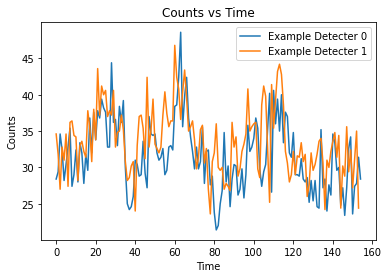

In [7]:
#plt.plot(GPSDataNew['Radiation (cps)'],label = "Student's Detector")
plt.plot(GPS0Data["Radiation (cps)"],label = "Example Detecter 0")
plt.plot(GPS1Data["Radiation (cps)"],label = "Example Detecter 1")
plt.ylabel('Counts') 
plt.xlabel('Time')
plt.legend()                  
plt.title("Counts vs Time")                                 
plt.show()

The two sets of measurements appear to share the same overall peaks, shape, and similar CPS at each time interval. Detector 0's data appears to fluctuate a bit more than that of Detector 1. 

In [8]:
meanDet0 = np.mean(GPS0Data['Radiation (cps)'])
sigmaDet0 = np.std(GPS0Data['Radiation (cps)'])
xDet0 = np.linspace(meanDet0 - 5*sigmaDet0, meanDet0 + 5*sigmaDet0, 100)
yDet0 = norm.pdf(xDet0, meanDet0, sigmaDet0)

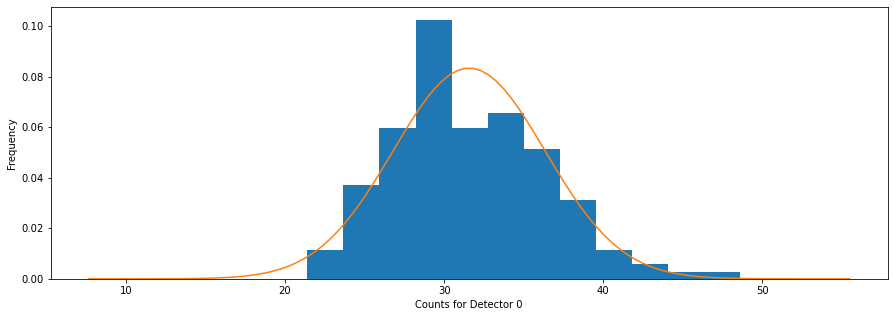

In [9]:
plt.ion()
fig1 = plt.figure(1, figsize=(15,5))
ax1 = fig1.add_subplot()
fig1.canvas.draw()
ax1.clear()
plt.hist(GPS0Data["Radiation (cps)"], density = True, bins = 12)
ax1.plot(xDet0, yDet0)
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Counts for Detector 0")
fig1.canvas.draw()
display.display(plt.gcf())
display.clear_output(wait=True)

In [10]:
meanDet1 = np.mean(GPS1Data['Radiation (cps)'])
sigmaDet1 = np.std(GPS1Data['Radiation (cps)'])
xDet1 = np.linspace(meanDet1 - 5*sigmaDet1, meanDet1 + 5*sigmaDet1, 100)
yDet1 = norm.pdf(xDet1, meanDet1, sigmaDet1)

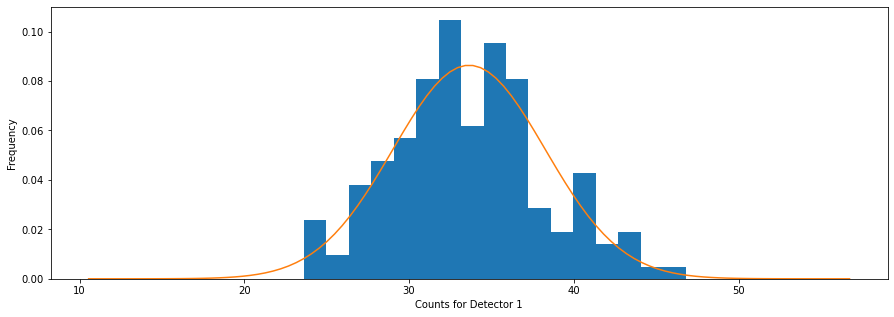

In [11]:
plt.ion()
fig1 = plt.figure(1, figsize=(15,5))
ax1 = fig1.add_subplot()
fig1.canvas.draw()
ax1.clear()
plt.hist(GPS1Data["Radiation (cps)"], density = True, bins = 17)
ax1.plot(xDet1, yDet1)
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Counts for Detector 1")
fig1.canvas.draw()
display.display(plt.gcf())
display.clear_output(wait=True)

In [12]:
print("The mean CPS detected by Detector 0 is " + str(meanDet0) + ".")
print("The standard deviation for Detector 0's data is " + str(sigmaDet0) + ".")
print("\n")

print("The mean CPS detected by Detector 1 is " + str(meanDet1) + ".")
print("The standard deviation for Detector 1's data is " + str(sigmaDet1) + ".")

stats.ttest_ind(GPS0Data['Radiation (cps)'],
                GPS1Data['Radiation (cps)'])

The mean CPS detected by Detector 0 is 31.565161290322582.
The standard deviation for Detector 0's data is 4.783420203677821.


The mean CPS detected by Detector 1 is 33.640259740259744.
The standard deviation for Detector 1's data is 4.619348347257892.


Ttest_indResult(statistic=-3.865976866100664, pvalue=0.0001350682917178349)

When comparing the means and the standard deviations of the two sets of data, it appears that the data sets agree with each other statistically, as seen above. However, after running an independent t-test for both data sets, we find that the p-value = 0.0001350682917178349 is less than 0.05, and thus makes our results statistically significant, as we reject the null hypothesis that there is no difference between the mean number of counts detected by the two detectors.

In [13]:
# GPSDataNew = data frame for CPS detected by the student's detector during lab (not the examples provided in bcourses)
stdev = np.std(GPSDataNew['Radiation (cps)'])
print("The measured standard deviation in the student's full data set is " + str(stdev) + ".")

N = len(GPSDataNew)
# math.sqrt(N)
# sigma = math.sqrt(N)
# if sigma = sqrt(N), sigma = 15.297058540778355
# sigma / stdev --> the variation due to counting statistics is 3.220471031823559 x greater than the standard deviation of the data set

# if sigma = math.sqrt(N), where N = the expected number of counts, which can be estimated by the mean of the full data set, 
# then N = mean_e:
mean_e = np.mean(GPSDataNew['Radiation (cps)'])
sigma_total = math.sqrt(mean_e)
print("The expected variation of the student's detector's data only varying due to counting statistics is " + str(sigma_total) + ".")

stcomp = sigma_total / stdev
print("The expected variation due to counting statistics is " + str(stcomp) + " x greater than the measured standard deviation in the full data set.")

perc_diff = ((sigma_total - stdev)/ sigma_total) * 100

print("The measured standard deviation in the full data set and the expected variation due to counting statistics are very similar, as the magnitude of their percent difference is " + str(perc_diff) + ".")


# if sigma = sigma_mean = math.sqrt(mean) = sigma_total / math.sqrt(N), sigma = 0.38255860310888734.
# stdev / sigma_mean --> The measured standard deviation in the full data set is 12.41625315133593 x greater than the expectation variation due to counting statistics


The measured standard deviation in the student's full data set is 4.749944461421394.
The expected variation of the student's detector's data only varying due to counting statistics is 5.852021347035042.
The expected variation due to counting statistics is 1.2320188992870578 x greater than the measured standard deviation in the full data set.
The measured standard deviation in the full data set and the expected variation due to counting statistics are very similar, as the magnitude of their percent difference is 18.832413968756654.


In [14]:
# Estimate uncertainty based on measured standard deviation using the central limit theorem (CLM)
# sigma_sqrtN = sqrt(N) / (sqrt(2 * sqrt(N_samples)))
# N_samples = N found earlier
# N = mean_e, since we are using the mean of the full data set as an estimate of the expected number of counts

sigma_sqrtN = math.sqrt(mean_e) / (math.sqrt(2 * math.sqrt(N)))
print("The estimated uncertainty on the mean and standard deviation of the distribution is " + str(sigma_sqrtN) + ".")

The estimated uncertainty on the mean and standard deviation of the distribution is 1.0580030982669935.


In [15]:
high_range = stdev + sigma_sqrtN
low_range = stdev - sigma_sqrtN
print("From the estimate of the expected variance and the uncertainty on that estimate, the amount of variation in the data would vary between " + str(low_range) + " and " + str(high_range) + ".")

From the estimate of the expected variance and the uncertainty on that estimate, the amount of variation in the data would vary between 3.6919413631544002 and 5.807947559688387.


There appears to be less variation in the data than expected from simple counting statistics, as the highest amount of variation possible in the data is approximately 5.81, which is less than the expected variation due to counting statistics (sigma = 5.85). Since these values are so close to each other, one can deduce that the amount of variation seen in the data is approximately the same as that expected from counting statistics. This implies that the sources of radiation contributing to the student's data had no huge effect of the variation in CPS detected by the detector, and that as N_samples increased, the radiation detected from the sources varied little.